In [1]:
import warnings
warnings.filterwarnings(action='ignore')

# <span style='color:red'>ch1. 허깅페이스</sapn>
- Transformers라이브러리 내 pipeline()함수
- Inference API : key를 사용
## 1. 텍스트 기반 감정분석(긍정/부정)

In [ ]:
from transformers import pipeline
classifier = pipeline(task='text-classification', model='distilbert-base-uncased-finetuned-sst-2-english')
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [17]:
classifier('이 영화는 정말 재미없네요.')

[{'label': 'POSITIVE', 'score': 0.911983072757721}]

In [19]:
result = classifier(["I've been waiting for a HuggingFace course my whole life.",
"I hate this so much!"])
[r.get('label') for r in result]

['POSITIVE', 'NEGATIVE']

In [20]:
classifier = pipeline(task='sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


# 2. 제로-샷 분류(zero-shot-classification)
- 비지도학습

In [2]:
from transformers import pipeline
classifier = pipeline(task='zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


# 3. text 생성

In [5]:
generator = pipeline(task='text-generation', model='gpt2') 
generator('In this course. We will teach you how to')

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course. We will teach you how to build your own custom Java library using the JVM.\n\nGetting started\n\nTo build your own Java library you should first create a new project. Then you should run the following command:\n\njava -jar project.jar\n\nUsing JVM\n\nTo run the JVM library, simply run:\n\njava -jar project.jar\n\nThe JVM library will be built.\n\nRunning the Java Library\n\nNote: When running the JVM library, you will need to create a single Java file called java.jar in your project directory. You will also need to create your own Java source files with the following location:\n\njava. jar ( " jar " )\n\nThe following path is how the JVM will be downloaded.\n\n/usr/bin/javaw -o java.jar\n\nRunning your JVM\n\nTo run your Java library, you will need to first create a new project. Then you should run the following command:\n\njava -jar project.jar\n\nThe JVM library will be built.\n\nRunning the Java Library\n\nNote: When running the JVM library, you 

In [6]:
generator('이 과정은 다음과 같은 방법을 알려드려요', pad_token_id=generator.tokenizer.eos_token_id)

[{'generated_text': '이 과정은 다음과 같은 방법을 알려드려요 방법을 먴에선 안아서 아태로소 아태로소 방법을 아태로소 방법을 먴에선 안아서 아태로소 아태로소 아태로소 방법을 아태로소 아태로소 아태로소 아태로소 아서 아태로소 아태로소 아태로소 아태로소 아태로소 �'}]

# 4. 마스크 채우기

In [22]:
unmasker = pipeline('fill-mask', 'google-bert/bert-base-uncased')

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [29]:
unmasker("I am [MASK]", top_k=2)

[{'score': 0.9796233773231506,
  'token': 1012,
  'token_str': '.',
  'sequence': 'i am.'},
 {'score': 0.01300693117082119,
  'token': 999,
  'token_str': '!',
  'sequence': 'i am!'}]

In [52]:
import os
from dotenv import load_dotenv
load_dotenv()
#print(os.environ['HF_TOKEN'])

True

In [53]:
from huggingface_hub import InferenceClient
client = InferenceClient(provider='hf-inference',api_key=os.environ['HF_TOKEN'])
result = client.fill_mask(
    "Hello, I'm a [MASK] model",
    model='google-bert/bert-base-uncased',
    top_k=2
)

In [55]:
[r.get('sequence') for r in result]

["hello, i ' m a fashion model", "hello, i ' m a new model"]

# 5. 개체명 인식(NER:Nmed Entity Recognition)

In [ ]:
from transformers import pipeline
ner = pipeline(task='ner')

c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [ ]:
ner('alice is girl')

# 6. 질의 응답

In [1]:
from transformers import pipeline
question_answer = pipeline('question-answering')

c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--distilbert--distilbert-base-cased-distilled-squad. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


In [5]:
question_answer(question='what is the food' ,context='food is eatable things and car is moving machine and radio is speaking box')

{'score': 0.4874422252178192,
 'start': 8,
 'end': 22,
 'answer': 'eatable things'}

# 7. 문서요약
- 현재 torch 2.6 이상이며 안정적

In [7]:
import torch

In [8]:
summarizer = pipeline('summarization','facebook/bart-large-cnn')

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--facebook--bart-large-cnn. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [10]:
summarizer("""So much for the quagmire. Donald Trump seems to have emerged from the worst crisis in America’s estrangement with Iran’s Islamic Republic with a win. 
           The president leaped on Tehran’s modest missile response Monday to the US pounding of its nuclear sites as a sign it wants to end escalations. 
           “CONGRATULATIONS WORLD, ITS TIME FOR PEACE!” he posted on Truth Social. 
           Trump’s exuberance was a sign that he sees the US involvement in the conflict as over, at least for now.
            And he followed up by announcing a ceasefire between Iran and Israel due to come into force later Tuesday. Ceasefires in the Middle East are often fragile and fleeting, as was underscored by attacks by both Israel and Iran in the hours before the truce was due to be established.
            But the president was already trumpeting his chosen image as a peacemaker and consummate deal maker, only 48 hours after US stealth bombers slammed Iran.
            “I think the ceasefire is unlimited. It’s going to go forever,” Trump told NBC News on Monday night, predicting that Israel and Iran will never “be shooting at each other again.”
            That’s a bold claim given the Middle East’s reputation as a graveyard of American presidencies. And for all Trump’s marketing skills, events will decide whether his breakthrough is for real or just another illusion.
            """,
            max_length=150,
            min_length=30,
            do_sample=False) # True면 무작위 단어로 창의적으로 요약

[{'summary_text': "Donald Trump seems to have emerged from the worst crisis in America's estrangement with Iran with a win. The president leaped on Tehran’s modest missile response Monday to the US pounding of its nuclear sites. And he followed up by announcing a ceasefire between Iran and Israel due to come into force later Tuesday."}]

# 8. 번역

In [11]:
# 한 -> 영
ko2en = pipeline('translation', 'Helsinki-NLP/opus-mt-ko-en')

# 영 -> 한
en2ko = pipeline('translation','Helsinki-NLP/opus-mt-tc-big-en-ko')

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-ko-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/313M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFMarianMTModel.

All the layers of TFMarianMTModel were initialized from the model checkpoint at Helsinki-NLP/opus-mt-ko-en.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMarianMTModel for predictions without further training.


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/842k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Device set to use 0


config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-tc-big-en-ko. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/418M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/790k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/815k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/959k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cpu


In [12]:
# 테스트 문장
ko_sentence = '이 문장을 영어로 번역해 주세요'
en_sentence = 'I enjoy learning about AI'
ko_result = ko2en(ko_sentence)[0]['translation_text']
en_result = en2ko(ko_sentence)[0]['translation_text']
print('한->영 :',ko_result)
print('영->한 :',en_result)

한->영 : Please translate this sentence into English.
영->한 : 아수스 모바일 besús의 엄마를 참조하십시오


In [13]:
ko2en([
    '이 문장을 영어로 번역해 주세요',
    '내일은 드디어 LLM 시작!',
    '머신러닝과 딥러닝 평가가 있어요'
])

[{'translation_text': 'Please translate this sentence into English.'},
 {'translation_text': "Tomorrow, we're finally starting the LLM!"},
 {'translation_text': "I've got machine-driving and deep-running evaluations."}]

# 9. 이미지를 설명하는 텍스트 생성

In [21]:
image2text = pipeline('image-to-text', "ydshieh/vit-gpt2-coco-en")

OSError: We couldn't connect to 'https://huggingface.co' to load the files, and couldn't find them in the cached files.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

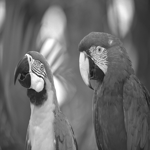

In [15]:
url='https://huggingface.co/datasets/Narsil/image_dummy/resolve/main/parrots.png'
from PIL import Image
import requests
image = Image.open(requests.get(url, stream=True).raw)
small_image = image.resize((150,150))
small_image

In [16]:
image2text(url, max_new_tokens=30)

NameError: name 'image2text' is not defined

In [18]:
# 내 pc의 이미지 설명
image = Image.open('images/fb.jpg')

In [19]:
image2text('images/fb.jpg', max_new_tokens=300)

NameError: name 'image2text' is not defined

In [ ]:
image2text(image, max_new_tokens=300)

# 10. 이미지분류

In [ ]:
image = Image.open('images/cat.jpg')
image

In [22]:
imgclassifier = pipeline('image-classification')

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


OSError: We couldn't connect to 'https://huggingface.co' to load the files, and couldn't find them in the cached files.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.